In [1]:
!pip install ucimlrepo


In [ ]:
#importando as bibliotecas necessárias
from ucimlrepo import fetch_ucirepo
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score #saber qual a precisão do modelo
from sklearn.model_selection import KFold #usar atécnica k-fold pra melhorar o modelo
from sklearn.feature_selection import SelectKBest, mutual_info_classif
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)


In [ ]:
# data (as pandas dataframes)
predict_students_dropout_and_academic_success.data.features


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,0,6,8,5,12.666667,0,15.5,2.8,-4.06
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,0,6,6,2,11.000000,0,11.1,0.6,2.02
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,0,8,9,1,13.500000,0,13.9,-0.3,0.79
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,0,5,6,5,12.000000,0,9.4,-0.8,-3.12


In [ ]:
predict_students_dropout_and_academic_success.data.targets


,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


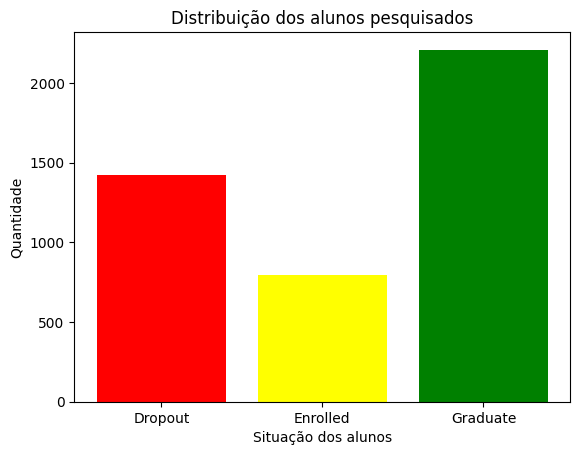

In [ ]:
targets = predict_students_dropout_and_academic_success.data.targets
# Contar a frequência de cada valor em `targets`
unique, counts = np.unique(targets, return_counts=True)
colors = ['red','yellow','green']
# Criar o gráfico de barras
plt.bar(unique, counts,color=colors[:len(unique)])
plt.xlabel('Situação dos alunos')
plt.ylabel('Quantidade')
plt.title('Distribuição dos alunos pesquisados')
plt.show()

In [ ]:
targets = predict_students_dropout_and_academic_success.data.targets
features = predict_students_dropout_and_academic_success.data.features

targets = targets.iloc[:, 0]  # Pega a primeira (e única) coluna como Série

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=9)
fit = bestfeatures.fit(features,targets)
dfscores = pd.DataFrame(fit.scores_, columns=['Score'])
# Converter os nomes das colunas (features) em um DataFrame
dfcolumns = pd.DataFrame(features.columns, columns=['Feature'])
# Combinar os DataFrames para obter um DataFrame com os nomes das features e seus escores
featureScores = pd.concat([dfcolumns, dfscores], axis=1)


print(featureScores.nlargest(9,'Score'))



                                   Feature     Score
30     Curricular units 2nd sem (approved)  0.302493
31        Curricular units 2nd sem (grade)  0.242165
24     Curricular units 1st sem (approved)  0.240534
25        Curricular units 1st sem (grade)  0.181695
16                 Tuition fees up to date  0.089256
23  Curricular units 1st sem (evaluations)  0.078814
29  Curricular units 2nd sem (evaluations)  0.069007
3                                   Course  0.055980
22     Curricular units 1st sem (enrolled)  0.055918
